In [4]:
%matplotlib inline 
#有了matplotlib inline 就可以省掉plt.show()了
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *
#import pylab #使用pylab模式，可以直接使用numpy、pandas和绘图，而不需要再次引入,会配置为使用你所指定的matplotlib gui后端，还会提供一种更接近于matlab的界面
#%pylab
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Toggle code

## 算法比较
通过使用相同的数据、相同的方法来评估不同的算法，以便得到一个准确的结果

In [6]:
filename = './csvs/user_label_7day_0301.csv'
datasource = pd.read_csv(filename)
#datasource.head(10)
data = datasource[datasource['user_label_7day.fplatformname']=='新浪平台']
#data.shape
array = data.values
X = array[:,5:9].astype(np.int64)
Y = array[:,9].astype(np.int64)

KNN:0.952(0.014)
LDA:0.937(0.015)
SVM:0.952(0.014)
NB:0.894(0.029)
CART:0.905(0.015)
LR:0.951(0.016)


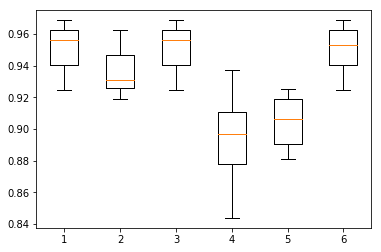

In [12]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds,random_state=seed)
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['NB'] = GaussianNB()
results = []
for name in models:
    result = cross_val_score(models[name],X,Y,cv=kfold)
    results.append(result)
    msg = '%s:%.3f(%.3f)'% (name,result.mean(),result.std())
    print(msg)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticklabels(models.keys())
plt.boxplot(results);


## 自动流程
在机器学习方面有一些可以采用的标准化流程，这些标准化流程是从共同的问题中提炼出来的。  
在scikit-learn中提供了自动化运行流程的工具--Pipeline  
Pipeline能够处理训练数据集与评估数据集之间的数据泄露问题

### 数据准备和生成模型的Pipeline


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
steps = []
steps.append(('Standardize',StandardScaler()))
steps.append(('lda',LinearDiscriminantAnalysis()))
model = Pipeline(steps)
result = cross_val_score(model,X,Y,cv=kfold)
result

array([ 0.9625   ,  0.91875  ,  0.9375   ,  0.95     ,  0.93125  ,
        0.9625   ,  0.93125  ,  0.91875  ,  0.93125  ,  0.9245283])

### 特征选择和生成模型的Pipeline

In [16]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# 生成FeatureUnion
features = []
features.append(('pca',PCA()))
features.append(('select_best',SelectKBest(k='all')))

# 生成Pipeline
steps = []
steps.append(('feature_union',FeatureUnion(features)))
steps.append(('logistic',LogisticRegression()))
model = Pipeline(steps)
result = cross_val_score(model,X,Y,cv=kfold)
result.mean()

0.95057783018867925